In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# from keras import backend as K
# K.set_image_dim_ordering('th')

np.random.seed(7)

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print('X type:', X_train.dtype)
print('Y type:', X_train.dtype)
print('X_train.shape =', X_train.shape)
print('Y_train.shape =', Y_train.shape)
print('X_test.shape =', X_test.shape)
print('Y_test.shape =', Y_test.shape)

X type: uint8
Y type: uint8
X_train.shape = (60000, 28, 28, 1)
Y_train.shape = (60000,)
X_test.shape = (10000, 28, 28, 1)
Y_test.shape = (10000,)


In [3]:
X_train = X_train / X_train.max()
X_train = X_train.astype('float64')
X_test = X_test / X_test.max()
X_test = X_test.astype('float64')

In [4]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
n_labels = Y_train.shape[1]
print('Y_train.shape =', Y_train.shape)
print('Y_test.shape =', Y_test.shape)

Y_train.shape = (60000, 10)
Y_test.shape = (10000, 10)


In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', name='h1_conv2D'))
model.add(MaxPooling2D(pool_size=(2, 2), name='h1_pooling2D'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', name='h2_conv2D'))
model.add(MaxPooling2D(pool_size=(2, 2), name='h2_pooling2D'))
model.add(Dropout(0.2, name='dropout'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name='dense'))
model.add(Dense(10, activation='softmax', name='output'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1_conv2D (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
h1_pooling2D (MaxPooling2D)  (None, 12, 12, 32)        0         
_________________________________________________________________
h2_conv2D (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
h2_pooling2D (MaxPooling2D)  (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
__________

In [6]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s - loss: 0.3821 - acc: 0.8825 - val_loss: 0.0895 - val_acc: 0.9741
Epoch 2/10
60000/60000 [==============================] - 45s - loss: 0.0995 - acc: 0.9694 - val_loss: 0.0521 - val_acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 43s - loss: 0.0693 - acc: 0.9781 - val_loss: 0.0434 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 44s - loss: 0.0568 - acc: 0.9827 - val_loss: 0.0348 - val_acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 45s - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0363 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 58s - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 53s - loss: 0.0373 - acc: 0.9882 - val_loss: 0.0303 - val_acc: 0.9905
Epoch 8/10
60000/60000 [==============================

In [7]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print('test loss =', scores[0])
print('test accuracy =', scores[1])

test loss = 0.0280423639973
test accuracy = 0.9912


dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])


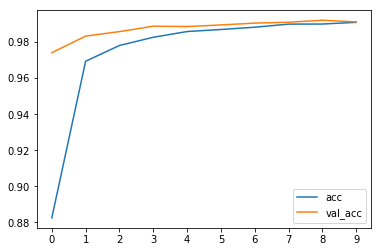

In [8]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.xticks(range(len(history.history['acc'])))
plt.show()

In [9]:
model.predict(X_test[0].reshape(1, 28, 28, 1))

array([[  8.24618507e-09,   2.55258129e-07,   4.25916551e-06,
          1.82419652e-04,   2.31606984e-10,   1.63260285e-08,
          1.11723646e-14,   9.99811828e-01,   1.33281134e-07,
          1.02648050e-06]], dtype=float32)

In [10]:
def image_label_predict(i):
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    label = np.argmax(Y_test[i])
    predict = np.argmax(model.predict(X_test[i].reshape(1, 28, 28, 1)))
    plt.title('image[%d]: label=%d, predict=%d' %(i, label, predict))
    plt.show()
    return 

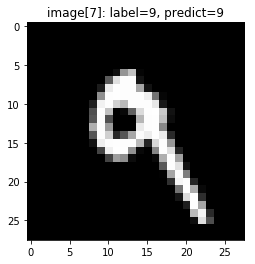

In [11]:
image_label_predict(7)

In [12]:
from sklearn.metrics import confusion_matrix

Y_predict = model.predict(X_test)
Y_predict = np.argmax(Y_predict, axis=1)
Y_test = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test, Y_predict)
print(cm)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1128    2    0    0    0    4    1    0    0]
 [   1    0 1027    0    2    0    0    2    0    0]
 [   0    0    1 1005    0    3    0    1    0    0]
 [   0    0    0    0  975    0    1    0    0    6]
 [   1    0    0    5    0  885    1    0    0    0]
 [   4    1    0    0    2    4  947    0    0    0]
 [   1    0    5    2    0    0    0 1014    1    5]
 [   3    0    4    4    0    3    1    0  957    2]
 [   1    0    0    0    6    3    0    1    2  996]]


In [13]:
import pandas as pd

df_confusion = pd.DataFrame(cm, index=range(10), columns=range(10))
df_confusion

,0,1,2,3,4,5,6,7,8,9
0,978,0,0,0,0,0,1,1,0,0
1,0,1128,2,0,0,0,4,1,0,0
2,1,0,1027,0,2,0,0,2,0,0
3,0,0,1,1005,0,3,0,1,0,0
4,0,0,0,0,975,0,1,0,0,6
5,1,0,0,5,0,885,1,0,0,0
6,4,1,0,0,2,4,947,0,0,0
7,1,0,5,2,0,0,0,1014,1,5
8,3,0,4,4,0,3,1,0,957,2
9,1,0,0,0,6,3,0,1,2,996


In [14]:
# Let's find the off-diagnoal elements and see what they look like :)